# Linear Regression Model

In this notebook, I will be applying algorithms from the first family of machine learning 
techniques that is supervised learning. The aim of this notebook is to showcase my ability 
to apply machine learning algorithms to well-specified tasks and to evaluate the performance of 
these algorithms and to use this evaluation to improve performance.

The data provided has 100 pairs of values, the values in the first column are explanatory values/observations. The values in the second column are the corresponding response variable values

The task of this notebook is to, 

1st Using Python, apply least squares regression to fit a line to the data. Plot the data and the fitted 
line on the same axes.

2nd Calculate the coefficient of determination (the 𝑅2score) of your prediction and print it.

In [181]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression

The 1st & 2nd lines are importing Numpy & pandas libraries, np & pd allows me to reference it back to libraries,so that i don't need to write these libraries names again and again into further code.

The 3rd line imports a submodule pyplot of the module matplotlib and plt for referencing
The 4th line importing linear_model,which is a submodule of the sklearn module and from there importing LinearRegression function.

Here loading csv file into df varaible, to read that particular csv file

In [182]:
df=pd.read_csv('regression1.csv')


Here I'M reshaping the data into 2-D array and using X & Y varaibles to store csv file data for further operations.

In [183]:
X = df.iloc[:,0].values.reshape(-1,1)
Y=df['y']


I'M using reg varaible to store LinearRegression() class and after that I'M using fit method for fitting the X and Y values on x & Y axis. After that I have created y_pred variable which will predict linear regression relationship with X-axis.

In [184]:
reg = LinearRegression()
reg.fit(X,Y)
y_pred = reg.predict(X)

This step creat scatter plot using my X, Y and y prediction values

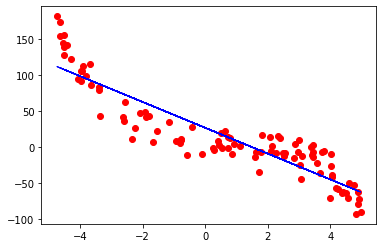

In [185]:
plt.scatter(X, Y,  color='red')
plt.plot(X, y_pred, color='blue', linewidth=1)

Now I want to spilt my data into traing and testing, for that I'M importing train_test_split class from  sklearn.model_selection.
Then IM creating X_train, X_test, y_train, y_test varaibles and IM spilting training & testing data into 30/70


In [186]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.33,random_state=42)
reg_train = LinearRegression()
reg_train.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

To calculate MSE IM importing  mean_squared_error class from sklearn.metrics

In [187]:
from sklearn.metrics import mean_squared_error

In [188]:
def display_results(X_test,y_test,reg):
    plt.scatter(X_test, y_test,  color='red')
    plt.plot(X_test, reg.predict(X_test), color='blue', linewidth=1)
    plt.show()

In [189]:
print('Intercept: {}'.format(reg.intercept_))
print('Gradient: {}'.format(reg.coef_[0]))
print('Coefficient of determination: {}'.format(reg.score(X_test,y_test)))
print('MSE: {}'.format(mean_squared_error(y_test,reg.predict(X_test))))

Intercept: 26.40571405758142
Gradient: -17.95952740897864
Coefficient of determination: 0.7675819654696702
MSE: 760.2692578611334


Now I would like to print my whole test dataset.

Test Dataset


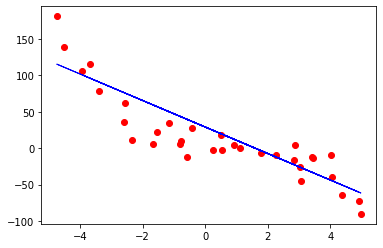

In [190]:
print('Test Dataset')
display_results(X_test,y_test,reg_train)

Printing test dataset with outliers and using random state = 44 for now.

Test Dataset With Outlier


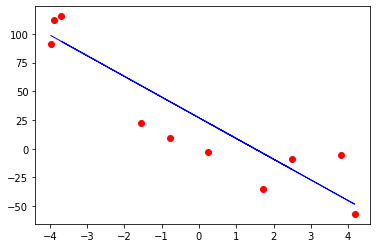

In [191]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.10,random_state=44)
reg_train = LinearRegression()
reg_train.fit(X_train, y_train)
print('Test Dataset With Outlier')
display_results(X_test,y_test,reg_train)

In [192]:
print('Coefficient of determination: {}'.format(reg.score(X_test,y_test)))
print('MSE: {}'.format(mean_squared_error(y_test,reg.predict(X_test))))

Coefficient of determination: 0.8265460496766852
MSE: 580.627698452398


When spliting data into 80/20 fro testing & training and incresing random state at 80.

Test Dataset With Outlier


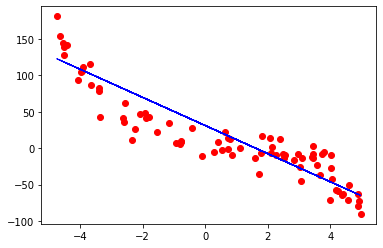

In [193]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.80,random_state=80)
reg_train = LinearRegression()
reg_train.fit(X_train, y_train)
print('Test Dataset With Outlier')
display_results(X_test,y_test,reg_train)

In [194]:
print('Coefficient of determination: {}'.format(reg.score(X_test,y_test)))
print('MSE: {}'.format(mean_squared_error(y_test,reg.predict(X_test))))

Coefficient of determination: 0.8352348865394998
MSE: 572.9910086252173


Test Dataset With Outlier


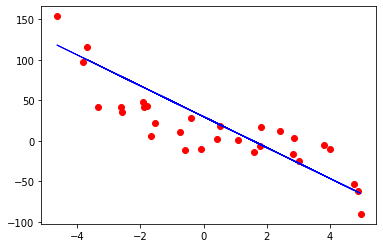

Coefficient of determination: 0.6834137266702646
MSE: 733.3350521261616


In [195]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.30,random_state=40)
reg_train = LinearRegression()
reg_train.fit(X_train, y_train)
print('Test Dataset With Outlier')
display_results(X_test,y_test,reg_train)
print('Coefficient of determination: {}'.format(reg.score(X_test,y_test)))
print('MSE: {}'.format(mean_squared_error(y_test,reg.predict(X_test))))

From the above data visulization, we can see that, when we input lower or higher values then there is grater variation in the linear relationship, so we only predict accutately for particular range of input values with this linear model.